<style>
.custom-markdown {
  background-color: #0a2b4a;
  color: white;
  border-radius: 10px;
  border: 2px solid black; /* Adjust border thickness as needed */
  margin: auto;  /* Adjust margin as needed */
  text-align: center;
  width: 500px;
  height: 70px;
  font-size: 30px;
  display: flex; /* Use flexbox */
  align-items: center; /* Vertically center content */
  justify-content: center; /* Horizontally center content (optional) */
}
</style>

<div class="custom-markdown">
  <b>Exploratory Data Analysis</b>
</div>

## Table of Contents

- [Messages Lenght](#messages-length)
- [Words Frequency](#word-frequency)
- [Sentiment Distribution](#sentiment-distribution)
- [Temporal Sentiment](#temporal-sent)
- [Emoji Precense](#emoji)
- [Specific User](#specific-user)
- [Todo](#todo)

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

from collections import Counter



In [27]:
# Load File into a DataFrame and look the firsts rows

file = '..\\data\\dataSocialMediaClean.csv'
df = pd.read_csv(file, delimiter='\t', engine='python', header=0, index_col=0)
df.head(5)

,id,message,name,id_user,username,id_post,link,date,user_link,weekday,...,sentiment,reply_screen_name,created_at,owner,shortcode,hour,clean_message,clean_message_noemo,emojis_in_message,sentiment_code
0,63d415fe24f17c7a0a38762a,Lo que tiene que hacer el Miss Venezuela es r...,Lisette Diaz,marazul41,marazul41,718139826350485,http://www.facebook.com/MissVenezuelaOficial/p...,2023-01-14,http://www.facebook.com/marazul41,Sábado,...,negativo,MissVenezuelaOficial,0.0,0,0,00:00:00,hacer miss venezuela retirarse miss uni señal ...,hacer miss venezuela retirarse miss uni señal ...,0,-1
1,63d415fe24f17c7a0a38762b,Me imagino que dentro del plan de acción está ...,Kendra Pérez,kendra.pereztabares,kendra.pereztabares,718139826350485,http://www.facebook.com/MissVenezuelaOficial/p...,2023-01-14,http://www.facebook.com/kendra.pereztabares,Sábado,...,negativo,MissVenezuelaOficial,0.0,0,0,00:00:00,imagino dentro plan acción tener sistema votac...,imagino dentro plan acción tener sistema votac...,0,-1
2,63d415fe24f17c7a0a38762c,"No, esta el de seleccionar lo mejor para la or...",Karen Isabel,karen.isabel.5,karen.isabel.5,718139826350485,http://www.facebook.com/MissVenezuelaOficial/p...,2023-01-14,http://www.facebook.com/karen.isabel.5,Sábado,...,negativo,MissVenezuelaOficial,0.0,0,0,00:00:00,seleccionar mejor organizacion tomando cuentas...,seleccionar mejor organizacion tomando cuentas...,0,-1
3,63d415fe24f17c7a0a38762d,Hermosas 🌠💕,Mariaida Medina,MARIAIDA.MEDINA,MARIAIDA.MEDINA,718139826350485,http://www.facebook.com/MissVenezuelaOficial/p...,2023-01-14,http://www.facebook.com/MARIAIDA.MEDINA,Sábado,...,positivo,MissVenezuelaOficial,0.0,0,0,00:00:00,hermosas 🌠💕,hermosas,2,1
4,63d415fe24f17c7a0a38762e,Nada! Ando enojada! Que clase de robo y super ...,Mariam Sequera,mariam.sequera.3,mariam.sequera.3,718139826350485,http://www.facebook.com/MissVenezuelaOficial/p...,2023-01-14,http://www.facebook.com/mariam.sequera.3,Sábado,...,negativo,MissVenezuelaOficial,0.0,0,0,00:00:00,ando enojada clase robo super descarado fe nue...,ando enojada clase robo super descarado fe nue...,3,-1


In [28]:
# First Look of columns and its data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22255 entries, 0 to 22373
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   22255 non-null  object 
 1   message              22255 non-null  object 
 2   name                 22255 non-null  object 
 3   id_user              22255 non-null  object 
 4   username             22255 non-null  object 
 5   id_post              22255 non-null  int64  
 6   link                 22255 non-null  object 
 7   date                 22255 non-null  object 
 8   user_link            22255 non-null  object 
 9   weekday              22255 non-null  object 
 10  just_emoji           22255 non-null  bool   
 11  sentiment            22255 non-null  object 
 12  reply_screen_name    22255 non-null  object 
 13  created_at           22255 non-null  float64
 14  owner                22255 non-null  object 
 15  shortcode            22255 non-null  obje

In [29]:
# We can already see that the sentiment of the messages in general is positive
df.describe()

,id_post,created_at,emojis_in_message,sentiment_code
count,2.225500e+04,2.225500e+04,22255.000000,22255.000000
mean,1.797452e+16,1.670528e+09,2.251988,0.534442
std,7.684528e+14,7.350289e+07,3.547232,0.743002
min,7.144340e+14,0.000000e+00,0.000000,-1.000000
25%,1.794477e+16,1.673752e+09,0.000000,0.000000
50%,1.797380e+16,1.673758e+09,1.000000,1.000000
75%,1.801949e+16,1.673791e+09,3.000000,1.000000
max,1.835798e+16,1.674647e+09,109.000000,1.000000


In [30]:
# Looking for nulls
df.isnull().sum()

id                        0
message                   0
name                      0
id_user                   0
username                  0
id_post                   0
link                      0
date                      0
user_link                 0
weekday                   0
just_emoji                0
sentiment                 0
reply_screen_name         0
created_at                0
owner                     0
shortcode                 0
hour                      0
clean_message             0
clean_message_noemo    2809
emojis_in_message         0
sentiment_code            0
dtype: int64

<style>
.custom-markdown {
  background-color: #0a2b4a;
  color: white;
  border-radius: 10px;
  border: 2px solid black; /* Adjust border thickness as needed */
  margin: auto;  /* Adjust margin as needed */
  text-align: center;
  width: 500px;
  height: 70px;
  font-size: 30px;
  display: flex; /* Use flexbox */
  align-items: center; /* Vertically center content */
  justify-content: center; /* Horizontally center content (optional) */
}
</style>

<div id="messages-length" class="custom-markdown">
  <b>🕵️‍♀️ Messages Lenght 🕵️‍♂️ </b>
</div>

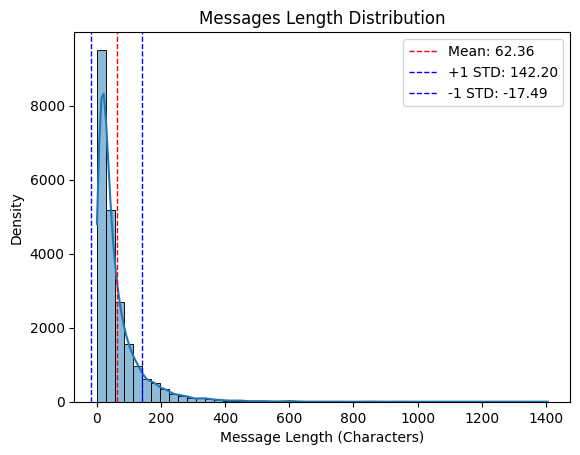

In [31]:
df['text_length'] = df['message'].apply(len)
text_std = df['text_length'].std()
text_mean = df['text_length'].mean()

sns.histplot(df['text_length'], bins=50, kde=True)
# Add annotations for mean and standard deviation
plt.axvline(x=text_mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {text_mean:.2f}')  # Vertical line for mean
plt.axvline(x=text_mean + text_std, color='blue', linestyle='dashed', linewidth=1, label=f'+1 STD: {text_mean + text_std:.2f}')  # Vertical line for mean + 1 STD
plt.axvline(x=text_mean - text_std, color='blue', linestyle='dashed', linewidth=1, label=f'-1 STD: {text_mean - text_std:.2f}')  # Vertical line for mean - 1 STD

plt.title('Messages Length Distribution')  
plt.xlabel('Message Length (Characters)')  
plt.ylabel('Density') 
plt.legend()

plt.show()

> Most messages are short, but a significant tail exists for longer messages.  
> The distribution is right-skewed, indicating more variation in message lengths.


---

<style>
.custom-markdown {
  background-color: #0a2b4a;
  color: white;
  border-radius: 10px;
  border: 2px solid black; /* Adjust border thickness as needed */
  margin: auto;  /* Adjust margin as needed */
  text-align: center;
  width: 500px;
  height: 70px;
  font-size: 30px;
  display: flex; /* Use flexbox */
  align-items: center; /* Vertically center content */
  justify-content: center; /* Horizontally center content (optional) */
}
</style>

<div id="word-frequency" class="custom-markdown">
  <b> 🆒 Words Frequency 🆒 </b>
</div>

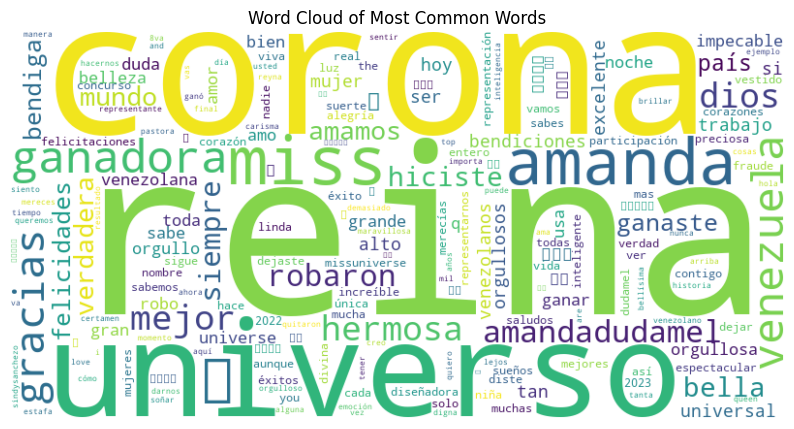

In [32]:
from wordcloud import WordCloud

all_words = ' '.join(df['clean_message']).lower()
tokens = word_tokenize(all_words)
word_freq = Counter(tokens)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()

> Amanda Dudamel's is the focus, with "Universo", "Reina", "Corona" and "Amanda" standing out.  
> Proud and joyful words like "Orgullo" and "Alegría" dominate, reflecting celebratory messages.  
> "Venezuela" emphasizes her national representation.


---

<style>
.custom-markdown {
  background-color: #0a2b4a;
  color: white;
  border-radius: 10px;
  border: 2px solid black; /* Adjust border thickness as needed */
  margin: auto;  /* Adjust margin as needed */
  text-align: center;
  width: 500px;
  height: 70px;
  font-size: 30px;
  display: flex; /* Use flexbox */
  align-items: center; /* Vertically center content */
  justify-content: center; /* Horizontally center content (optional) */
}
</style>

<div id="sentiment-distribution" class="custom-markdown">
  <b>❤️Sentiment Distribution❤️ </b>
</div>

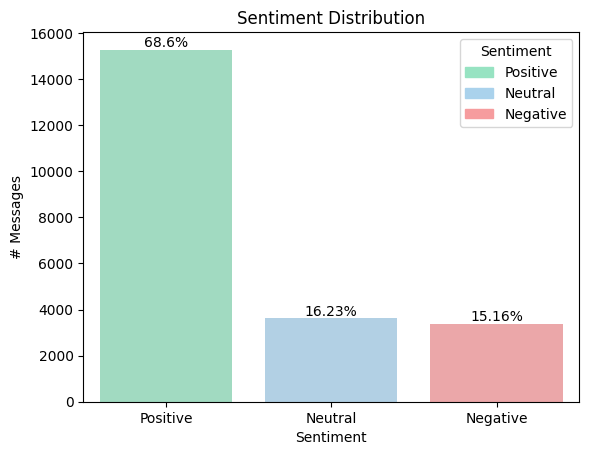

In [33]:
from matplotlib.patches import Patch

sentiment_counts = df['sentiment_code'].value_counts()
total_count = len(df) 

# Calculate percentages
percentages = round((sentiment_counts / total_count) * 100, 2)

# Custom Palette & Labels
palette = ['#F69C9E','#AAD2EC' ,'#97E3C2']
custom_labels = ['Positive', 'Neutral', 'Negative']

sentiment_order = ['1', '0', '-1']

sentiment_mapping = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}
new_labels = [sentiment_mapping[x] for x in sentiment_counts.index]

# Set the legend handles to the same color of my bars
handles = [Patch(color=palette[i], label=custom_labels[i]) for i in reversed(range(len(custom_labels)))]

# Set the percentages in top of each bar
for i, (index, value) in enumerate(sentiment_counts.items()):
    plt.text(i, value + 0.1, f"{percentages.iloc[i]}%", ha='center', va='bottom')

sns.barplot(x=sentiment_counts.index, y =sentiment_counts.values, palette=palette, hue=sentiment_counts.index,  order=sentiment_order , legend=False)
plt.title('Sentiment Distribution')
plt.ylabel("# Messages")
plt.xlabel("Sentiment")
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

plt.legend(title="Sentiment", labels=custom_labels, loc='upper right', handles=handles)
plt.show()

> **Most comments are positive 😊**


---


<style>
.custom-markdown {
  background-color: #0a2b4a;
  color: white;
  border-radius: 10px;
  border: 2px solid black; /* Adjust border thickness as needed */
  margin: auto;  /* Adjust margin as needed */
  text-align: center;
  width: 600px;
  height: 70px;
  font-size: 30px;
  display: flex; /* Use flexbox */
  align-items: center; /* Vertically center content */
  justify-content: center; /* Horizontally center content (optional) */
}
</style>

<div id="temporal-sent" class="custom-markdown">
  <b>😊📅Temporal sentiment analysis📅😊</b>
</div>

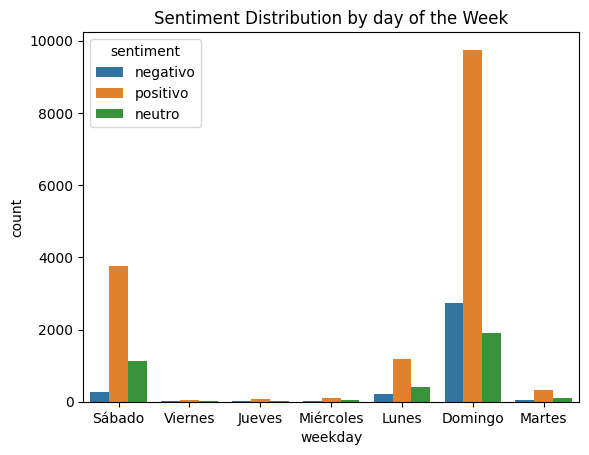

In [39]:
sns.countplot(data=df, x='weekday', hue='sentiment')
plt.title('Sentiment Distribution by day of the Week')
plt.show()


> The sentiment distribution appears to be relatively consistent throughout the week.  
> There is a slight increase in positive sentiment on Sundays  
> And overall increse in messages during the weekend


---


<style>
.custom-markdown {
  background-color: #0a2b4a;
  color: white;
  border-radius: 10px;
  border: 2px solid black; /* Adjust border thickness as needed */
  margin: auto;  /* Adjust margin as needed */
  text-align: center;
  width: 600px;
  height: 70px;
  font-size: 30px;
  display: flex; /* Use flexbox */
  align-items: center; /* Vertically center content */
  justify-content: center; /* Horizontally center content (optional) */
}
</style>

<div id="emoji"  class="custom-markdown">
  <b>❤️😁🤬😍Emoji presence❤️😁🤬😍</b>
</div>

sentiment  negativo    neutro  positivo
has_emoji                              
False      0.232332  0.156223  0.611445
True       0.114641  0.165149  0.720210


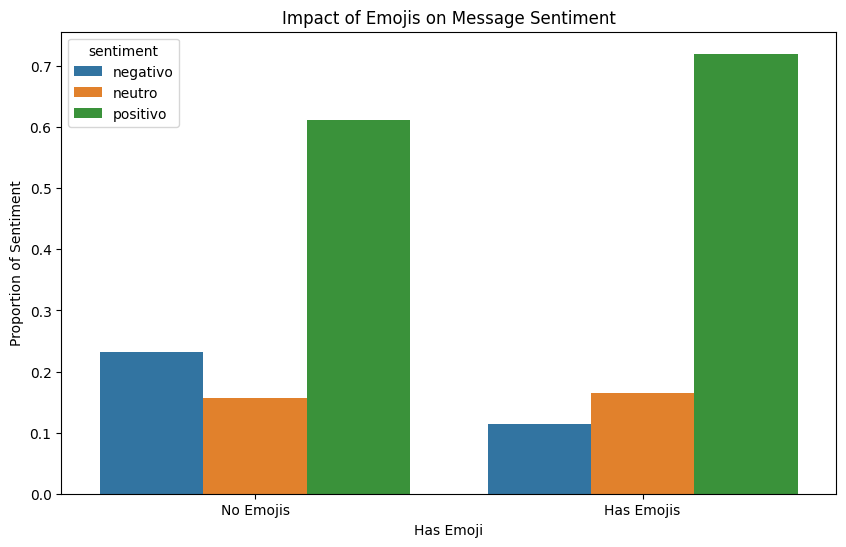

In [48]:
df['has_emoji'] = df['emojis_in_message'] > 0
# Group by 'has_emoji' and 'sentiment' and count occurrences
sentiment_counts = df.groupby(['has_emoji', 'sentiment']).size().unstack(fill_value=0)

# Calculate proportions
sentiment_proportions = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0)
print(sentiment_proportions)

# Reset index for plotting
sentiment_proportions = sentiment_proportions.reset_index()

# Melt the DataFrame for easier plotting with seaborn
sentiment_melted = sentiment_proportions.melt(id_vars='has_emoji', var_name='sentiment', value_name='proportion')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='has_emoji', y='proportion', hue='sentiment', data=sentiment_melted)
plt.title('Impact of Emojis on Message Sentiment')
plt.xlabel('Has Emoji')
plt.ylabel('Proportion of Sentiment')
plt.xticks([0, 1], ['No Emojis', 'Has Emojis'])
plt.show()

> More emojis might not make messages more positive. People might just use emojis more often when they're already feeling good.  
> Negative messages likely have fewer emojis, while positive messages tend to be emoji-rich.


---


<style>
.custom-markdown {
  background-color: #0a2b4a;
  color: white;
  border-radius: 10px;
  border: 2px solid black; /* Adjust border thickness as needed */
  margin: auto;  /* Adjust margin as needed */
  text-align: center;
  width: 600px;
  height: 70px;
  font-size: 30px;
  display: flex; /* Use flexbox */
  align-items: center; /* Vertically center content */
  justify-content: center; /* Horizontally center content (optional) */
}
</style>

<div id="specific-user"  class="custom-markdown">
  <b>👩🏼‍🦰👨🏾Specific users 👩🏾‍🦱🧑🏼‍🦱</b>
</div>

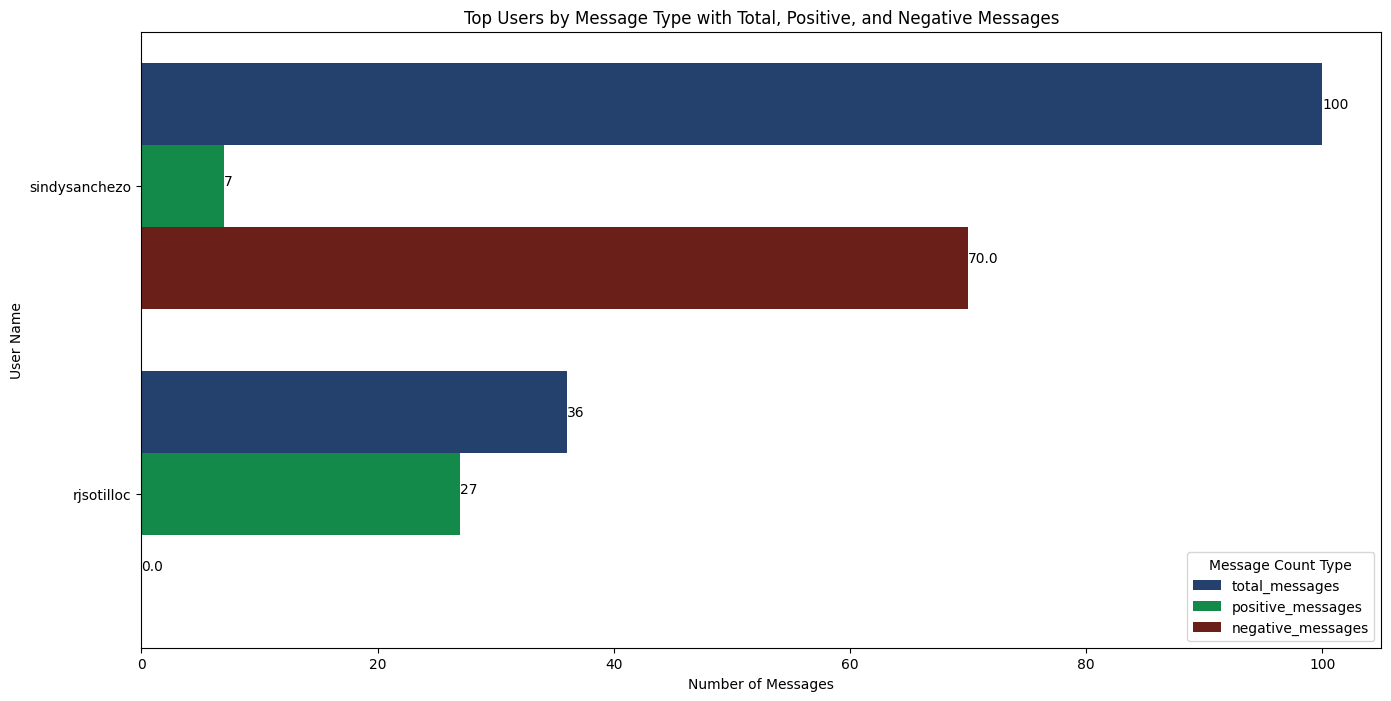

In [145]:
# Count total messages per user
total_messages = df['username'].value_counts().reset_index()
total_messages.columns = ['username', 'total_messages']

# Count positive messages per user
positive_messages = df[df['sentiment'] == 'positivo']['username'].value_counts().reset_index()
positive_messages.columns = ['username', 'positive_messages']

# Count negative messages per user
negative_messages = df[df['sentiment'] == 'negativo']['username'].value_counts().reset_index()
negative_messages.columns = ['username', 'negative_messages']

# Identify the top users
top_user_total = total_messages.loc[total_messages['total_messages'].idxmax()]
top_user_positive = positive_messages.loc[positive_messages['positive_messages'].idxmax()]
top_user_negative = negative_messages.loc[negative_messages['negative_messages'].idxmax()]

# Create a DataFrame for plotting
# top_users = pd.DataFrame({
#     'username': [top_user_total['username'], top_user_positive['username'], top_user_negative['username']],
#     'count': [top_user_total['total_messages'], top_user_positive['positive_messages'], top_user_negative['negative_messages']],
#     'message_type': ['total_messages', 'positive_messages', 'negative_messages']
# })
top_users = pd.DataFrame({
    'username': [top_user_total['username'], top_user_positive['username'], top_user_negative['username']],
    'message_type': ['Most Messages', 'Most Positive Messages', 'Most Negative Messages']
})

# Merge the total, positive, and negative message counts
top_users = top_users.merge(total_messages, on='username', how='left')
top_users = top_users.merge(positive_messages, on='username', how='left')
top_users = top_users.merge(negative_messages, on='username', how='left')

# Fill NaN values with 0
top_users = top_users.fillna(0)
top_users.drop_duplicates(subset='username', keep='first', inplace=True)
# Melt the DataFrame for easier plotting with seaborn
top_users_melted = top_users.melt(id_vars=['username'], value_vars=['total_messages', 'positive_messages', 'negative_messages'], var_name='count_type', value_name='count')
custom_palette = ['#183e7a','#009c49','#78150a']
# Plotting
plt.figure(figsize=(16, 8))
bar_plot = sns.barplot(x='count', y='username', hue='count_type', data=top_users_melted, palette=custom_palette)
plt.title('Top Users by Message Type with Total, Positive, and Negative Messages')
plt.xlabel('Number of Messages')
plt.ylabel('User Name')
plt.legend(title='Message Count Type',loc='lower right')

# Adding labels
for index, row in top_users.iterrows():
    total = row['total_messages']
    positive = row['positive_messages']
    negative = row['negative_messages']
    
    # Total messages label
    bar_plot.text(total, index - 0.25, total)
    
    # Positive messages label
    bar_plot.text(positive, index , positive)
    
    # Negative messages label
    bar_plot.text(negative, index + 0.25, negative)

plt.show()

> Our data reveals some interesting trends in user activity and sentiment. **Sindysanchezo** stands out as the most active user, sending **100 messages!** However, **70 of those messages lean negative. (70%)** On the other hand, **rjsotilloc** seems to be radiating positivity, **with 27 out of their 36 messages classified as positive.(75%)** It's interesting to see such a contrast between these two users!


---

<style>
.custom-markdown {
  background-color: #0a2b4a;
  color: white;
  border-radius: 10px;
  border: 2px solid black; /* Adjust border thickness as needed */
  margin: auto;  /* Adjust margin as needed */
  text-align: center;
  width: 600px;
  height: 70px;
  font-size: 30px;
  display: flex; /* Use flexbox */
  align-items: center; /* Vertically center content */
  justify-content: center; /* Horizontally center content (optional) */
}
</style>

<div id="todo"  class="custom-markdown">
  <b>📋📋ToDo📋📋 </b>
</div>

> While time limitations restrict further exploration, these aspects warrant further investigation at a later time:

- Investigating Themes in Negative Messages: We can delve deeper to understand the specific topics or issues generating negativity from the user with the most negative messages.
- Identifying Positive Sentiment Drivers: Analyzing messages from the top positive users might reveal the aspects or topics that are generating the most positive sentiment.